In [56]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline 
plt.rcParams['figure.figsize'] = [10.0, 6.0] # Plot size 조정
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지


In [57]:
boarding_pop_by_subway = pd.read_csv('./data/boarding_pop_by_subway.csv', encoding='utf-8', header=0)
no_data = pd.read_csv('./data/no_data.csv', encoding='utf-8', header=0)
out_of_seoul_stations = pd.read_csv('./data/out_of_seoul_stations.csv', encoding='utf-8', header=0)
skt_floating_pop = pd.read_csv('./data/skt_floating_pop.csv', encoding='utf-8', header=0)
subway = pd.read_csv('./data/subway.csv', encoding='utf-8', header=0)

# 인구수만 사용
objects = pd.read_csv('./data/objects.csv', encoding='utf-8', header=None, names=['ID', '20남', '30남', '40남', '50남', '6-70남', '20여', '30여', '40여', '50여', '6-70여']) # 인구수만 사용

# 비율, 총인원 혼합사용
# objects = pd.read_csv('./data/clustering_parameters.csv', encoding='utf-8'); # 비율, 총인원 혼합사용. 20남,30남,40남,50남,6-70남,20여,30여,40여,50여,6-70여,총인원

print(objects.shape)

(1504, 11)


In [58]:
# 이상치 제거
inout_pop = pd.read_csv('data/seoul_boarding_pop_by_subway.csv', encoding='utf-8')
inout_pop = inout_pop.drop('datetime', axis=1)

drop_index = list()

for stn in range(len(inout_pop)):
    total_pop_test = sum(inout_pop.iloc[stn, 2:50])
    if total_pop_test < 10000:
        drop_index += [stn]
print(drop_index)
inout_pop = inout_pop.drop(drop_index, axis=0)
inout_pop['station']

[90, 191, 196, 317, 323, 351]


0      동대문
1      동묘앞
2      서울역
3       시청
4      신설동
      ... 
371     망우
372     상봉
373     양원
374     중랑
375     회기
Name: station, Length: 370, dtype: object

In [59]:
# objects 에서 동일한 이상치 제거
df = objects.copy();
drop_objects_index = [];

for i in drop_index:
    drop_objects_index.append(i*4);
    drop_objects_index.append(i*4+1);
    drop_objects_index.append(i*4+2);
    drop_objects_index.append(i*4+3);

df = df.drop(drop_objects_index, axis=0)
df = df.drop('ID', axis=1)
df = df.reset_index(drop=True)
print(df)

               20남           30남           40남           50남         6-70남  \
0      8115.686815  10554.018460  11412.989438  10401.025724   9327.534119   
1     12448.921340  18415.790564  19390.622316  16962.820328  15313.030138   
2     10428.704853  12763.518598  12983.126334  11469.468990  10039.749714   
3      5433.442450   5220.376021   5185.364287   4940.982084   4956.954188   
4      4041.845655   5448.640398   5891.516589   5309.761925   4664.157931   
...            ...           ...           ...           ...           ...   
1475   1669.231571   1969.556740   1976.448007   2103.321270   2218.246485   
1476  22706.225083  19811.777841  19892.142059  19675.766497  23357.464100   
1477  24189.821406  20467.480841  21317.084562  21785.958568  26931.774486   
1478  22620.724251  19835.000725  20601.746403  20830.338472  25196.545168   
1479  10913.209763   9886.436537   9931.306463   9644.630035  11468.541662   

               20여           30여           40여           50여   

In [6]:
# 데이터 2차원으로 단순화 ['male', 'total']

df_male = df['20남']+df['30남']+df['40남']+df['50남']+df['6-70남'];

# df_total = df['총인원'];
df_total = np.sum(df, axis=1);

df_data = pd.DataFrame({'male' : df_male, 'total' : df_total});
print(df_data.shape)

(1480, 2)


In [60]:
# 역 이름 + 시간대 리스트 생성

object_list = [];
for s in inout_pop['station']:
    object_list.append(s+' 아침');
    object_list.append(s+' 낮');
    object_list.append(s+' 저녁');
    object_list.append(s+' 밤');
print(len(object_list))

1480


[[ 27364.33414915  56548.06394763]
 [206071.95167982 419707.55617978]
 [ 87183.43708447 178690.69723618]]
KMeans(n_clusters=3, random_state=0)


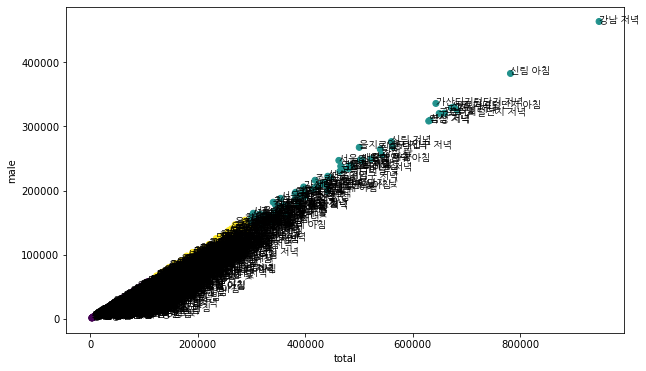

In [8]:
k_group = [3] # Choose k range

for k in k_group:
    km = KMeans(n_clusters = k, random_state = 0); # Initial value => random_state attr.
    km.fit(df_data); # Commit clustering
    result = km.predict(df_data);
    
    # TODO : normalization
    """
    유동인구 중 최대치로 모두를 나누기 ... 작은 숫자가 너무 작을 수 있음
    """
    
    print(km.cluster_centers_); # Print center
    # result[15] # Find cluster where the item belongs
    print(km)
    plt.scatter(df_data['total'], df_data['male'], c = result); # 점 plot 실행
    plt.xlabel('total');
    plt.ylabel('male');

    # 20-30대 승하차인원 vs 60-70대 승하차인원
    # 시간대 합침

    plt.rc('font', family='NanumGothic')
    plt.rc('font', size='10')
    for i in range(len(object_list)):
        plt.annotate('%s' % object_list[i], (df_data['total'][i], df_data['male'][i]))

    plt.show();

DBSCAN(eps=30000)


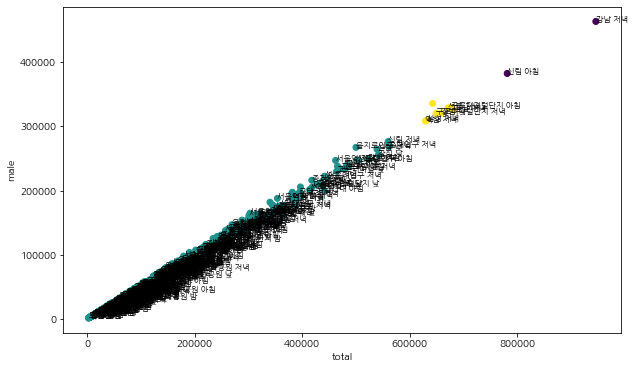

          label  cluster     total           male
41         강남 낮        1  658822.5  320722.488398
56   구로디지털단지 아침        1  677010.0  330183.272707
58   구로디지털단지 저녁        1  649101.5  320240.011604
106       삼성 저녁        1  632057.5  309572.246055
122       선릉 저녁        1  671781.5  328994.600779
174       역삼 저녁        1  629575.5  308333.877530
210       잠실 저녁        1  682365.0  325185.835319
826  가산디지털단지 저녁        1  642870.0  335769.759149


In [9]:
# DBSCAN

k_group = [3] # Choose k range

for k in k_group:
    ds = DBSCAN(eps=30000).fit(df_data);
    print(ds)
    plt.scatter(df_data['total'], df_data['male'], c=ds.labels_);
    plt.xlabel('total');
    plt.ylabel('male');
    plt.rc('font', size='8')
    for i in range(len(inout_pop)):
        plt.annotate('%s' % object_list[i], (df_data['total'][i], df_data['male'][i]))
    
    plt.show();
a = pd.DataFrame({'label':object_list, 'cluster':ds.labels_, 'total':df_data['total'], 'male':df_data['male']});
print(a[a['cluster'] == 1])

In [10]:
print(len(object_list));
print(df_data.shape)

1480
(1480, 2)


In [11]:
"""
여기부터 10차원 데이터 그대로 사용한 PCA
"""

'\n여기부터 10차원 데이터 그대로 사용한 PCA\n'

PCA(n_components=2)
[0.96534549 0.02280123]
[[ 0.28353121  0.35797801  0.33941082  0.28440926  0.28192659  0.31555917
   0.34118126  0.31486956  0.29330084  0.33873352]
 [-0.09719928  0.38555628  0.34277032  0.03253046 -0.35666058  0.2126878
   0.28548429 -0.01539574 -0.28938552 -0.62082508]]


,20남,30남,40남,50남,6-70남,20여,30여,40여,50여,6-70여
0,8115.686815,10554.018460,11412.989438,10401.025724,9327.534119,9183.633494,8908.472052,9240.380141,8784.669110,10291.090648
1,12448.921340,18415.790564,19390.622316,16962.820328,15313.030138,15874.355759,16334.074905,15624.082920,14291.422893,14790.878838
2,10428.704853,12763.518598,12983.126334,11469.468990,10039.749714,12472.165877,10905.078647,10490.138571,9695.771410,10408.777007
3,5433.442450,5220.376021,5185.364287,4940.982084,4956.954188,5673.390425,4452.746963,4757.310944,4686.121710,5885.810928
4,4041.845655,5448.640398,5891.516589,5309.761925,4664.157931,4630.050924,4587.111415,4694.754267,4409.149804,5079.011091
...,...,...,...,...,...,...,...,...,...,...
1475,1669.231571,1969.556740,1976.448007,2103.321270,2218.246485,1677.162993,1895.225682,2030.276278,2276.185724,2688.845250
1476,22706.225083,19811.777841,19892.142059,19675.766497,23357.464100,21745.618381,19091.202091,19749.489383,21107.061582,28801.752982
1477,24189.821406,20467.480841,21317.084562,21785.958568,26931.774486,22798.312043,19977.973936,21665.300904,23438.039888,33027.253365
1478,22620.724251,19835.000725,20601.746403,20830.338472,25196.545168,21234.185875,19059.504051,20418.767817,22096.856145,30448.331094


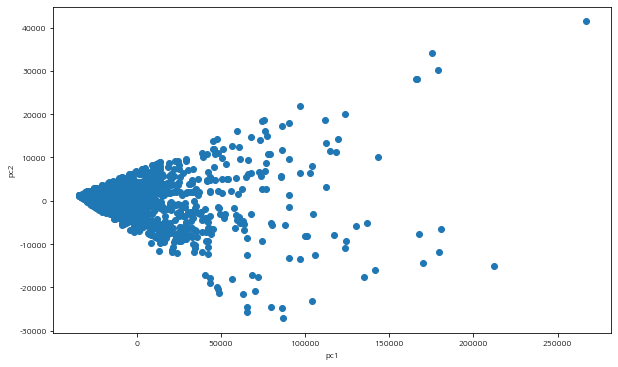

In [12]:
# PCA, n=2
n = 2;
pca = PCA(n_components=n);

pc = pca.fit_transform(df);
df_pc = pd.DataFrame(data=pc, columns = ['pc1', 'pc2']);
print(pca);
print(pca.explained_variance_ratio_);
plt.scatter(df_pc['pc1'], df_pc['pc2']);
plt.xlabel('pc1');
plt.ylabel('pc2');
plt.rc('font', size='20');

print(pca.components_)
df

PCA(n_components=10)
분산 : 
[9.65345486e-01 2.28012282e-02 7.11864062e-03 2.68192055e-03
 1.07042107e-03 5.98622734e-04 2.06782088e-04 1.02070120e-04
 5.36994651e-05 2.11287851e-05]


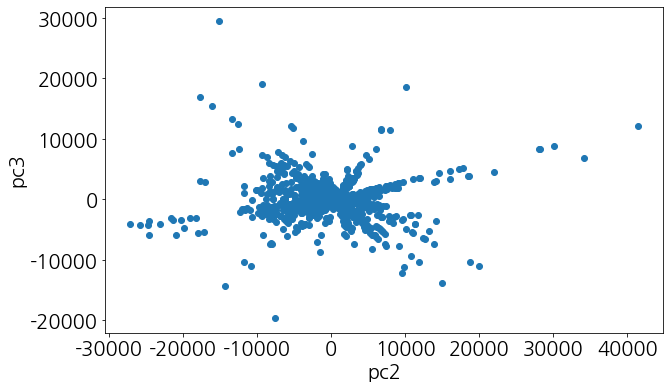

각 PC의 계수 :
[[ 0.28353121  0.35797801  0.33941082  0.28440926  0.28192659  0.31555917
   0.34118126  0.31486956  0.29330084  0.33873352]
 [-0.09719928  0.38555628  0.34277032  0.03253046 -0.35666058  0.2126878
   0.28548429 -0.01539574 -0.28938552 -0.62082508]
 [ 0.54261461  0.00066245 -0.38171696 -0.43729162 -0.11885956  0.53792131
   0.10006417 -0.12673021 -0.18496929  0.0697366 ]
 [ 0.36691604  0.22711597  0.12243752  0.40228092  0.19729177  0.01967194
  -0.46292929 -0.60714615 -0.06836728 -0.10027453]
 [ 0.29783009 -0.4795469   0.10647362  0.27294781 -0.18932025  0.23538306
  -0.3743749   0.47273262  0.1586359  -0.33977857]
 [ 0.33662074  0.28031088 -0.35635243 -0.0150336  -0.19621252 -0.43749598
   0.15986706  0.01278689  0.57479082 -0.30804493]
 [ 0.36858373  0.20759255  0.32950973 -0.22517012 -0.33818035 -0.44462064
  -0.24780244  0.26746374 -0.33795549  0.32025435]
 [-0.33499442  0.26189608 -0.01123691 -0.00681925 -0.56827315  0.33421974
  -0.35919045 -0.1054668   0.3880082   0.

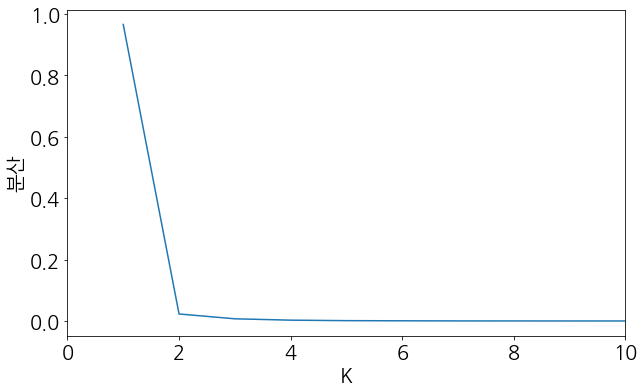

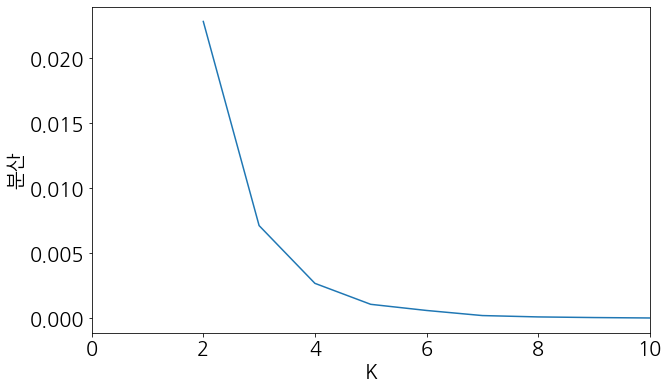

In [61]:
# PCA, n=10
n = 10;
pca = PCA(n_components=n);

pc = pca.fit_transform(df);
df_pc = pd.DataFrame(data=pc, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8' ,' pc9' ,'pc10']);
print(pca);
print("분산 : ");
print(pca.explained_variance_ratio_);
plt.rc('font', size='20');
plt.scatter(df_pc['pc2'], df_pc['pc3']);
plt.xlabel('pc2');
plt.ylabel('pc3');
plt.show();
print("각 PC의 계수 :")
print(pca.components_)
df
plt.plot([i+1 for i in range(10)], pca.explained_variance_ratio_);
plt.xlim([0,10]);
plt.xlabel('K');
plt.ylabel('분산');
plt.show();
plt.plot([i+2 for i in range(9)], pca.explained_variance_ratio_[1:]);
plt.xlim([0,10]);
plt.xlabel('K');
plt.ylabel('분산');
plt.show();



k = 2   |   silhouette score: 0.498967


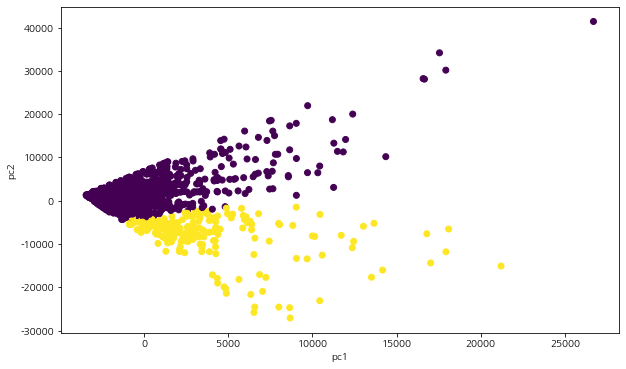

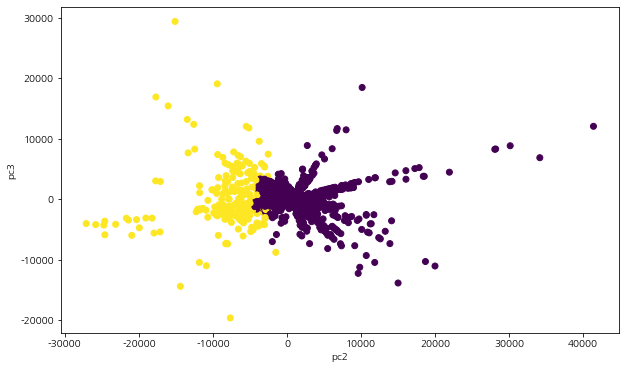

k = 3   |   silhouette score: 0.519349


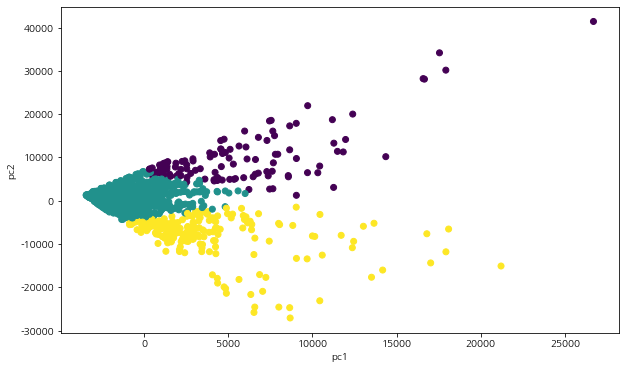

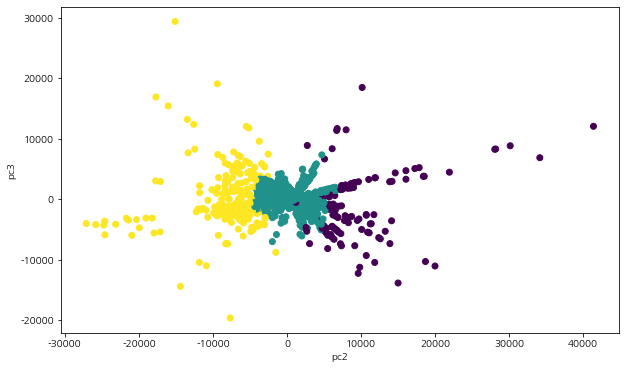

k = 4   |   silhouette score: 0.442685


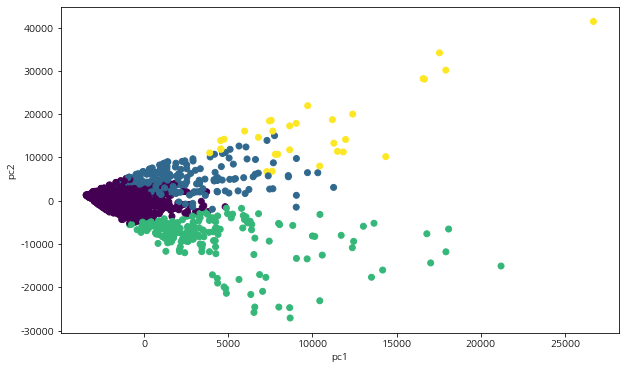

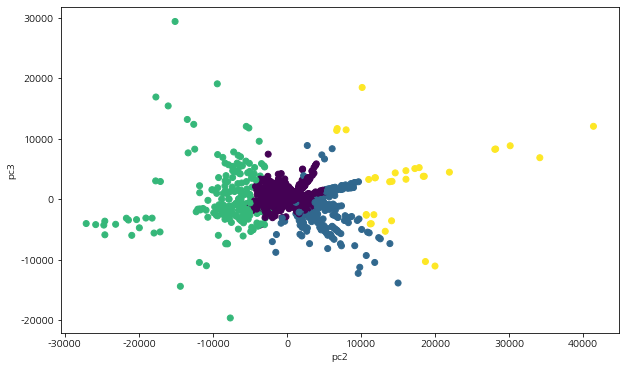

k = 5   |   silhouette score: 0.452395


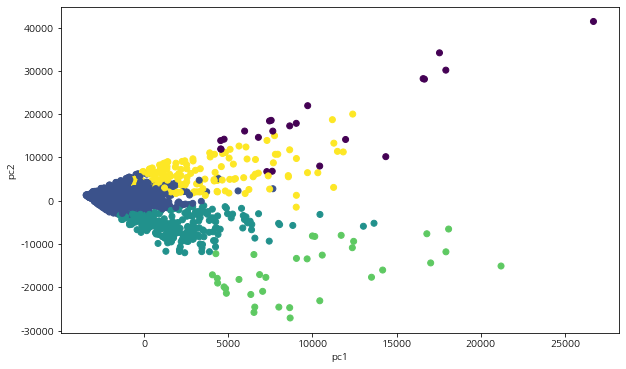

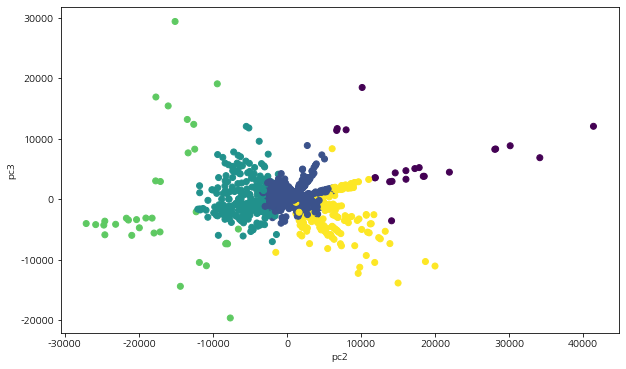

k = 6   |   silhouette score: 0.439108


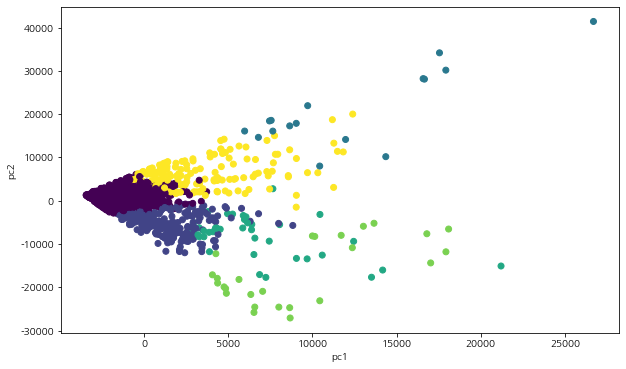

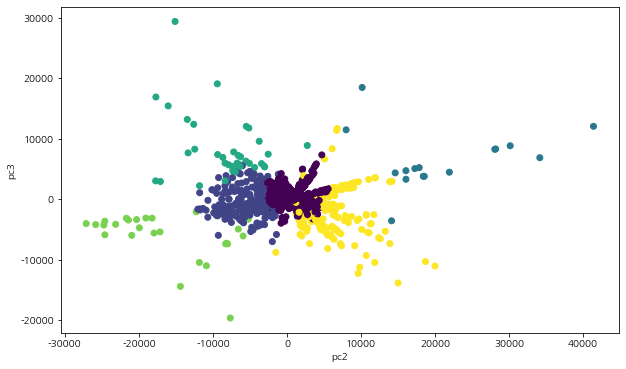

k = 7   |   silhouette score: 0.427627


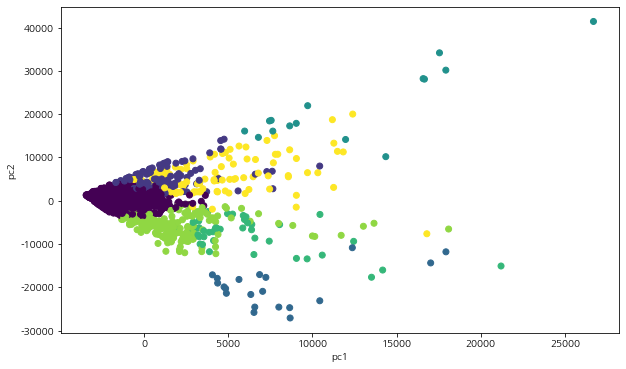

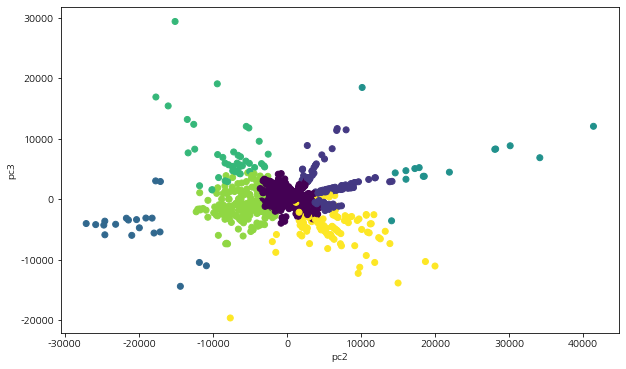

k = 8   |   silhouette score: 0.428804


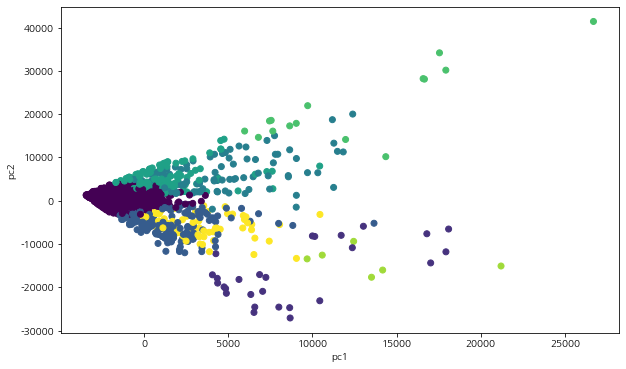

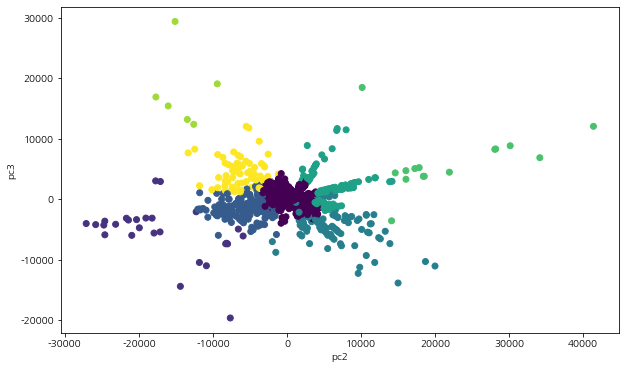

k = 9   |   silhouette score: 0.322377


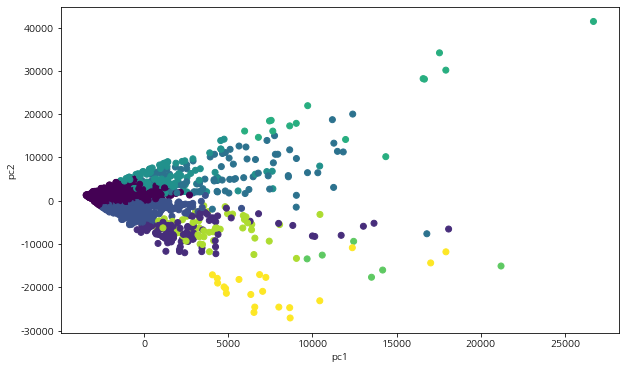

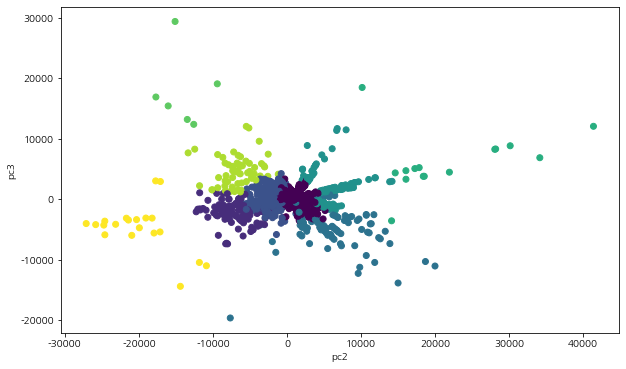

k = 10   |   silhouette score: 0.320889


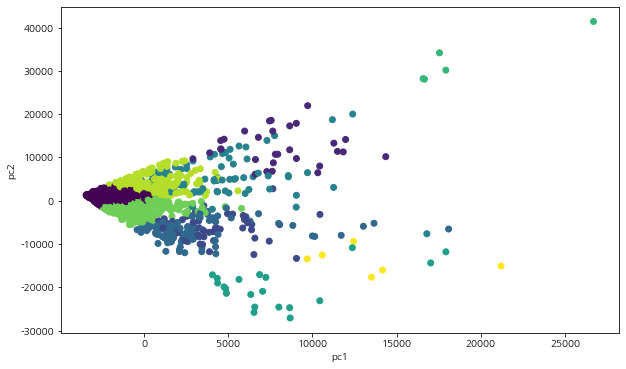

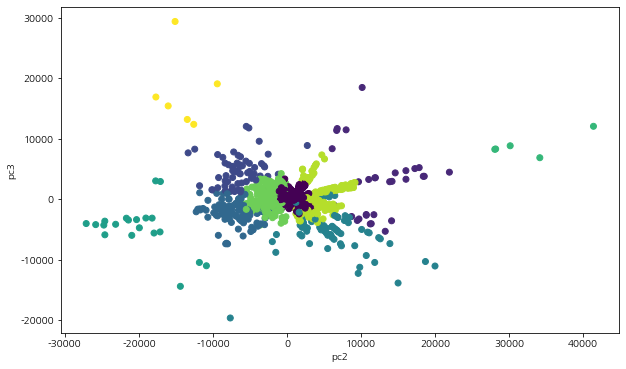

k = 11   |   silhouette score: 0.326673


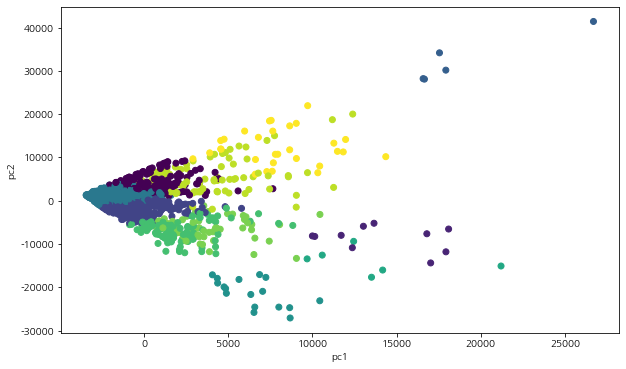

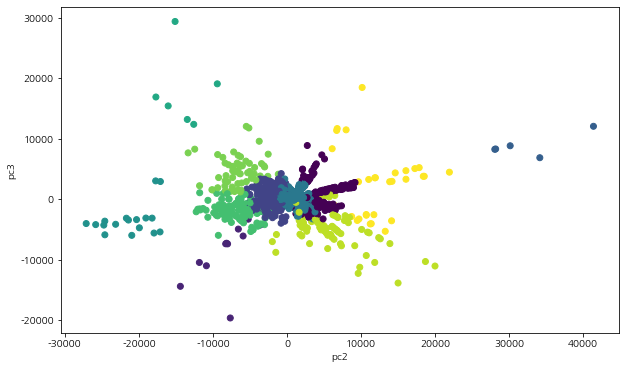

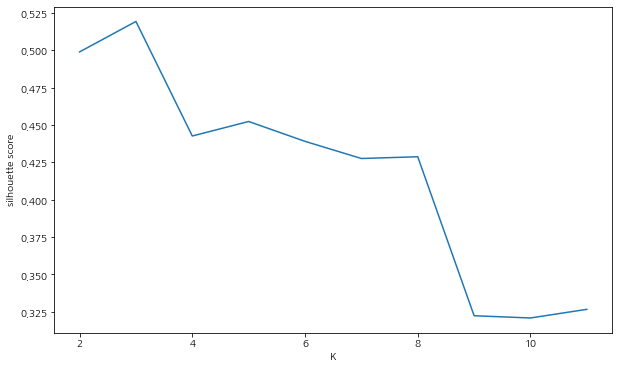

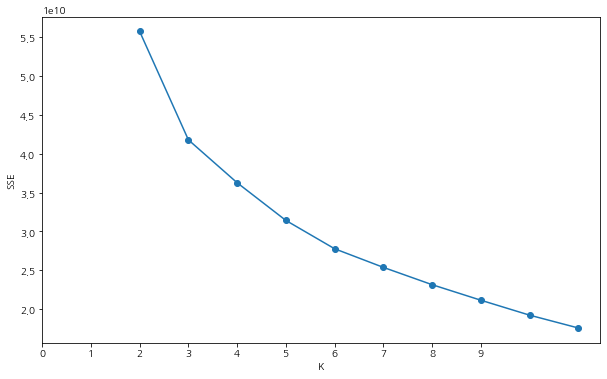

In [18]:
# KMeans to PCA
k_group = [i+2 for i in range(10)] # Choose k range
df_pc_kmeans = df_pc.copy();
df_pc_kmeans['pc1'] = df_pc_kmeans['pc1']/10; # pc1 축은 1/10 으로 normalize
silhouette_group = [];
sse_group = [];

result = [];
for k in k_group:
    km = KMeans(n_clusters = k, random_state = 0); # Initial value => random_state attr.
    km.fit(df_pc_kmeans); # Commit clustering
    result = km.predict(df_pc_kmeans);
    sse_group.append(km.inertia_);

    # print(km.cluster_centers_); # Print center
    sil_score = silhouette_score(df_pc_kmeans, result.T, metric='euclidean');
    silhouette_group.append(sil_score);

    print('k = %d   |   silhouette score: %f' %(k, sil_score));
    # pc1 vs pc2 그래프
    plt.scatter(df_pc_kmeans['pc1'], df_pc_kmeans['pc2'], c = result); # 점 plot 실행
    plt.xlabel('pc1');
    plt.ylabel('pc2');
    plt.show();
    
    # pc2 vs pc3 그래프
    plt.scatter(df_pc_kmeans['pc2'], df_pc_kmeans['pc3'], c = result); # 점 plot 실행
    plt.xlabel('pc2');
    plt.ylabel('pc3');
    plt.rc('font', size=10);
    plt.show();

# Silhouette 그래프
plt.plot(k_group, silhouette_group);
plt.xlabel('K');
plt.ylabel('silhouette score');
plt.show();

# SSE 엘보우
plt.plot(k_group, sse_group, marker="o");
plt.xlabel('K');
plt.ylabel('SSE');
plt.xticks(range(10));
plt.show();

8 th silhouette score: 0.428804


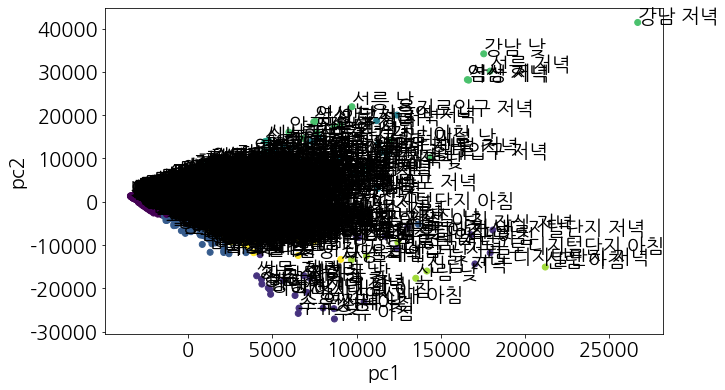

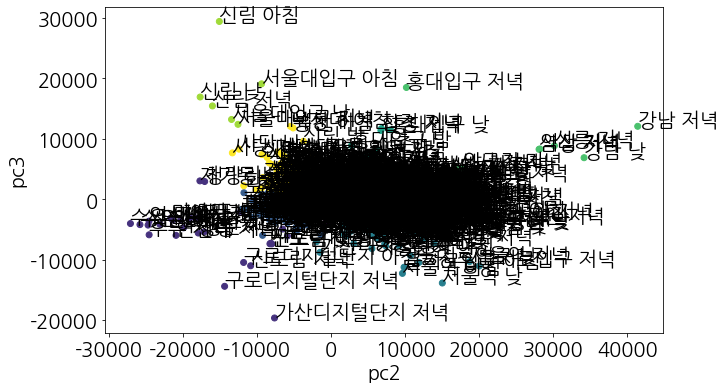

cluster : 0 / 동대문 아침
cluster : 3 / 동대문 낮
cluster : 0 / 동대문 저녁
cluster : 0 / 동대문 밤
cluster : 0 / 동묘앞 아침
cluster : 3 / 동묘앞 낮
cluster : 0 / 동묘앞 저녁
cluster : 0 / 동묘앞 밤
cluster : 3 / 서울역 아침
cluster : 3 / 서울역 낮
cluster : 3 / 서울역 저녁
cluster : 0 / 서울역 밤
cluster : 3 / 시청 아침
cluster : 3 / 시청 낮
cluster : 3 / 시청 저녁
cluster : 0 / 시청 밤
cluster : 7 / 신설동 아침
cluster : 7 / 신설동 낮
cluster : 7 / 신설동 저녁
cluster : 0 / 신설동 밤
cluster : 7 / 제기동 아침
cluster : 1 / 제기동 낮
cluster : 7 / 제기동 저녁
cluster : 0 / 제기동 밤
cluster : 3 / 종각 아침
cluster : 3 / 종각 낮
cluster : 3 / 종각 저녁
cluster : 0 / 종각 밤
cluster : 0 / 종로3가 아침
cluster : 3 / 종로3가 낮
cluster : 3 / 종로3가 저녁
cluster : 0 / 종로3가 밤
cluster : 0 / 종로5가 아침
cluster : 3 / 종로5가 낮
cluster : 3 / 종로5가 저녁
cluster : 0 / 종로5가 밤
cluster : 7 / 청량리 아침
cluster : 1 / 청량리 낮
cluster : 7 / 청량리 저녁
cluster : 0 / 청량리 밤
cluster : 5 / 강남 아침
cluster : 5 / 강남 낮
cluster : 5 / 강남 저녁
cluster : 3 / 강남 밤
cluster : 7 / 강변 아침
cluster : 7 / 강변 낮
cluster : 7 / 강변 저녁
cluster : 0 / 강변 밤
cluster : 7 / 건대입구 아침
cl

cluster : 0 / 광나루 저녁
cluster : 0 / 광나루 밤
cluster : 3 / 광화문 아침
cluster : 3 / 광화문 낮
cluster : 3 / 광화문 저녁
cluster : 0 / 광화문 밤
cluster : 0 / 군자 아침
cluster : 0 / 군자 낮
cluster : 0 / 군자 저녁
cluster : 0 / 군자 밤
cluster : 2 / 굽은다리 아침
cluster : 0 / 굽은다리 낮
cluster : 0 / 굽은다리 저녁
cluster : 0 / 굽은다리 밤
cluster : 0 / 길동 아침
cluster : 0 / 길동 낮
cluster : 0 / 길동 저녁
cluster : 0 / 길동 밤
cluster : 0 / 김포공항 아침
cluster : 0 / 김포공항 낮
cluster : 0 / 김포공항 저녁
cluster : 0 / 김포공항 밤
cluster : 2 / 까치산 아침
cluster : 2 / 까치산 낮
cluster : 2 / 까치산 저녁
cluster : 0 / 까치산 밤
cluster : 0 / 답십리 아침
cluster : 0 / 답십리 낮
cluster : 0 / 답십리 저녁
cluster : 0 / 답십리 밤
cluster : 0 / 동대문역사문화공원 아침
cluster : 0 / 동대문역사문화공원 낮
cluster : 0 / 동대문역사문화공원 저녁
cluster : 0 / 동대문역사문화공원 밤
cluster : 0 / 둔촌동 아침
cluster : 0 / 둔촌동 낮
cluster : 0 / 둔촌동 저녁
cluster : 0 / 둔촌동 밤
cluster : 0 / 마곡 아침
cluster : 0 / 마곡 낮
cluster : 0 / 마곡 저녁
cluster : 0 / 마곡 밤
cluster : 0 / 마장 아침
cluster : 0 / 마장 낮
cluster : 0 / 마장 저녁
cluster : 0 / 마장 밤
cluster : 0 / 마천 아침
cluster : 0 / 마천 낮
cl

cluster : 0 / 고속터미널 밤
cluster : 0 / 공항시장 아침
cluster : 0 / 공항시장 낮
cluster : 0 / 공항시장 저녁
cluster : 0 / 공항시장 밤
cluster : 0 / 구반포 아침
cluster : 0 / 구반포 낮
cluster : 0 / 구반포 저녁
cluster : 0 / 구반포 밤
cluster : 0 / 국회의사당 아침
cluster : 0 / 국회의사당 낮
cluster : 3 / 국회의사당 저녁
cluster : 0 / 국회의사당 밤
cluster : 0 / 김포공항 아침
cluster : 0 / 김포공항 낮
cluster : 0 / 김포공항 저녁
cluster : 0 / 김포공항 밤
cluster : 0 / 노들 아침
cluster : 0 / 노들 낮
cluster : 0 / 노들 저녁
cluster : 0 / 노들 밤
cluster : 7 / 노량진 아침
cluster : 7 / 노량진 낮
cluster : 7 / 노량진 저녁
cluster : 0 / 노량진 밤
cluster : 3 / 당산 아침
cluster : 3 / 당산 낮
cluster : 0 / 당산 저녁
cluster : 0 / 당산 밤
cluster : 0 / 동작 아침
cluster : 0 / 동작 낮
cluster : 0 / 동작 저녁
cluster : 0 / 동작 밤
cluster : 0 / 등촌 아침
cluster : 0 / 등촌 낮
cluster : 0 / 등촌 저녁
cluster : 0 / 등촌 밤
cluster : 0 / 마곡나루 아침
cluster : 0 / 마곡나루 낮
cluster : 0 / 마곡나루 저녁
cluster : 0 / 마곡나루 밤
cluster : 0 / 사평 아침
cluster : 0 / 사평 낮
cluster : 0 / 사평 저녁
cluster : 0 / 사평 밤
cluster : 0 / 샛강 아침
cluster : 0 / 샛강 낮
cluster : 0 / 샛강 저녁
cluster : 0 / 샛강 

NameError: name 'center' is not defined

In [70]:
# KMeans에서 k 고정
k=8
df_pc_kmeans = df_pc.copy();
df_pc_kmeans['pc1'] = df_pc_kmeans['pc1']/10;
silhouette_group = [];
result = [];
centers = [];
km = KMeans(n_clusters = k, random_state = 0); # Initial value => random_state attr.
km.fit(df_pc_kmeans); # Commit clustering
result = km.predict(df_pc_kmeans);

centers = km.cluster_centers_; # Print center
sil_score = silhouette_score(df_pc_kmeans, result.T, metric='euclidean');
silhouette_group.append(sil_score);
print('%d th silhouette score: %f' %(k, sil_score));

plt.scatter(df_pc_kmeans['pc1'], df_pc_kmeans['pc2'], c = result); # 점 plot 실행
plt.xlabel('pc1');
plt.ylabel('pc2');
for i in range(len(object_list)):
    plt.annotate('%s' % object_list[i], (df_pc_kmeans['pc1'][i], df_pc_kmeans['pc2'][i]))
plt.show();

plt.scatter(df_pc_kmeans['pc2'], df_pc_kmeans['pc3'], c = result); # 점 plot 실행
plt.xlabel('pc2');
plt.ylabel('pc3');
for i in range(len(object_list)):
    plt.annotate('%s' % object_list[i], (df_pc_kmeans['pc2'][i], df_pc_kmeans['pc3'][i]))
plt.rc('font', size=10);
plt.show();

df_pc_kmeans['cluster']=result
df_pc_kmeans['name']=object_list
count = [0,0,0,0,0,0,0,0]
for i in range(len(object_list)):
    print("cluster : "+str(df_pc_kmeans['cluster'][i])+" / " + str(df_pc_kmeans['name'][i]))
    for j in range(8):
        if df_pc_kmeans['cluster'][i]==j:
            count[j] = count[j]+1;
print(count)

8 th silhouette score: 0.428804


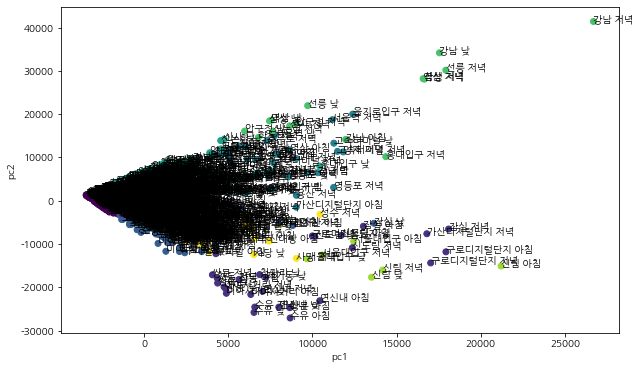

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,cluster,name
0,-479.445911,953.837049,-1370.340293,1686.193193,527.376822,-854.559702,-39.155033,7.078779,-122.121483,-136.867624,0,동대문 아침
1,1530.408380,3434.458816,-2811.574521,1849.549897,712.460483,-1187.420742,-1210.407200,-511.671525,-703.675670,-54.347061,3,동대문 낮
2,10.942884,2813.301183,385.037323,2106.789252,1202.608055,-788.040167,-584.872642,20.887161,-283.988131,-71.330080,0,동대문 저녁
3,-1909.688346,376.043903,1139.951699,1106.887933,529.519681,-326.375192,-39.467012,61.069282,-110.474047,-66.602373,0,동대문 밤
4,-1980.533402,1356.238075,-555.904687,880.270167,141.609206,-364.096361,-7.251367,-1.819388,-95.046642,-56.913912,0,동묘앞 아침
...,...,...,...,...,...,...,...,...,...,...,...,...
1475,-2877.822942,417.166908,49.431253,159.054111,-198.733350,123.007127,-122.184085,39.438821,-43.493971,-33.858273,0,중랑 밤
1476,3275.919145,-8331.585510,3048.908100,3133.561124,989.490926,-1614.751902,-312.673454,-707.877016,344.046704,85.401568,7,회기 아침
1477,3885.902111,-11791.010476,2238.550360,3419.321067,923.422087,-2428.477245,-454.021719,-1065.677902,234.117643,32.811079,7,회기 낮
1478,3471.755899,-10126.256800,1576.829525,3387.127675,800.825644,-1979.155977,-380.388115,-1076.191354,165.012926,80.986718,7,회기 저녁


In [20]:
# KMeans to PCA
k = 8
df_pc_kmeans = df_pc.copy();
df_pc_kmeans['pc1'] = df_pc_kmeans['pc1']/10;
# df_pc_kmeans = df_pc_kmeans.drop('pc1', axis=1);
silhouette_group = [];

km = KMeans(n_clusters = k, random_state = 0); # Initial value => random_state attr.
km.fit(df_pc_kmeans); # Commit clustering
result = km.predict(df_pc_kmeans);

# print(km.cluster_centers_); # Print center
sil_score = silhouette_score(df_pc_kmeans, result.T, metric='euclidean');
silhouette_group.append(sil_score);
print('%d th silhouette score: %f' %(k, sil_score));

plt.scatter(df_pc_kmeans['pc1'], df_pc_kmeans['pc2'], c = result); # 점 plot 실행
plt.xlabel('pc1');
plt.ylabel('pc2');
for i in range(len(object_list)):
    plt.annotate('%s' % object_list[i], (df_pc_kmeans['pc1'][i], df_pc_kmeans['pc2'][i]))

plt.show();

df_pc_kmeans['cluster']=result
df_pc_kmeans['name']=object_list
df_pc_kmeans



8 th silhouette score: 0.428804


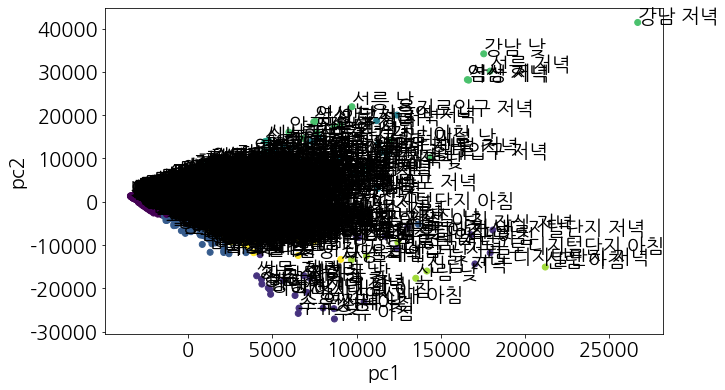

In [65]:
df_pc_kmeans = df_pc.copy();
df_pc_kmeans['pc1'] = df_pc_kmeans['pc1']/10;

k = 8

# df_pc_kmeans = df_pc_kmeans.drop('pc1', axis=1);
silhouette_group = [];

km = KMeans(n_clusters = k, random_state = 0); # Initial value => random_state attr.
km.fit(df_pc_kmeans); # Commit clustering
result = km.predict(df_pc_kmeans);

# print(km.cluster_centers_); # Print center
sil_score = silhouette_score(df_pc_kmeans, result.T, metric='euclidean');
silhouette_group.append(sil_score);
print('%d th silhouette score: %f' %(k, sil_score));

plt.scatter(df_pc_kmeans['pc1'], df_pc_kmeans['pc2'], c = result); # 점 plot 실행
plt.xlabel('pc1');
plt.ylabel('pc2');
for i in range(len(object_list)):
    plt.annotate('%s' % object_list[i], (df_pc_kmeans['pc1'][i], df_pc_kmeans['pc2'][i]))

plt.show();

In [76]:
dist_of_K = km.cluster_centers_
sorted(km.cluster_centers_[:,0], reverse=True)
print('           총인구  직장인  학생    남성')
print('cluster    pc1     pc2     pc3     pc4     object 개수  분석')
comment = ['인구 적음',
          '인구 많음, 시니어',
          '인구 적음, 시니어',
          '인구 보통, 직장인',
          '인구 보통, 직장인과 학생',
          '인구 많음, 직장인과 학생',
          '인구 많음, 학생',
          '인구 보통, 학생']

count = np.zeros(k)
for stn in range(len(df_pc_kmeans)):
    count[result[stn]] += 1

for i in range(k):
    pc1 = np.where(dist_of_K[i,0] == sorted(dist_of_K[:,0], reverse=True))[0][0]
    pc2 = np.where(dist_of_K[i,1] == sorted(dist_of_K[:,1], reverse=True))[0][0]
    pc3 = np.where(dist_of_K[i,2] == sorted(dist_of_K[:,2], reverse=True))[0][0]
    pc4 = np.where(dist_of_K[i,3] == sorted(dist_of_K[:,3], reverse=True))[0][0]
    ranking = '     {}      {}       {}       {}       {}       {}         {}'.format(i, pc1, pc2, pc3, pc4, int(count[i]), comment[i])
    print(ranking)

           총인구  직장인  학생    남성
cluster    pc1     pc2     pc3     pc4     object 개수  분석
     0      7       3       4       3       961         인구 적음
     1      2       7       7       6       27         인구 많음, 시니어
     2      6       4       5       5       188         인구 적음, 시니어
     3      3       1       6       1       104         인구 보통, 직장인
     4      5       2       3       4       104         인구 보통, 직장인과 학생
     5      1       0       1       7       15         인구 많음, 직장인과 학생
     6      0       6       0       0       6         인구 많음, 학생
     7      4       5       2       2       75         인구 보통, 학생
